# Loan Default Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/jillberry/Documents/Springboard_DS/Guided_Capstone_2/loans50k.csv', encoding = "ISO-8859-1")

**First I want to get an idea of the data so I look at the shape (number of rows & columns), first 5 entries (head), and the names of all of the features (columns).**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

In [4]:
df.shape

(50000, 32)

In [5]:
df.head()

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [6]:
df = df.round(2)

In [7]:
for col in df.columns:
    print(col)

loanID
amount
term
rate
payment
grade
employment
length
home
income
verified
status
reason
state
debtIncRat
delinq2yr
inq6mth
openAcc
pubRec
revolRatio
totalAcc
totalPaid
totalBal
totalRevLim
accOpen24
avgBal
bcOpen
bcRatio
totalLim
totalRevBal
totalBcLim
totalIlLim


**Next I want to see what values are missing and what features have missing values. I noted that most features only had 1 entry with missing values. Entry 34805 was empty except for the loanID. I deleted this entry.**

In [8]:
df.isna().sum()

loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64

In [9]:
df['loanID'].value_counts().head()

395825    1
434817    1
123497    1
457322    1
586347    1
Name: loanID, dtype: int64

In [10]:
df['state'].value_counts().head(10)

CA    6842
NY    4121
TX    4081
FL    3366
IL    2035
NJ    1819
PA    1786
OH    1725
GA    1643
VA    1516
Name: state, dtype: int64

In [11]:
len(df['state'].unique())

50

In [12]:
df[df['amount'].isna()].T

,34805
loanID,656728
amount,NaN
term,NaN
rate,NaN
payment,NaN
grade,NaN
employment,NaN
length,NaN
home,NaN
income,NaN


In [13]:
df.drop(index=df.index[34805], axis=0, inplace=True)

**Now that I've dropped the one row, I am left with 5 features that have missing values: <br>
employment:       2784 <br>
length:           2680 <br>
revolRatio:       18 <br>
bcOpen:           488 <br>
bcRatio:          520 <br>
It looks like there is a lot of overlap in missing values between employment/length and possibly bcOpen/bcRatio. In total 3285 rows have missing values.**

In [14]:
df.isna().sum()

loanID            0
amount            0
term              0
rate              0
payment           0
grade             0
employment     2784
length         2680
home              0
income            0
verified          0
status            0
reason            0
state             0
debtIncRat        0
delinq2yr         0
inq6mth           0
openAcc           0
pubRec            0
revolRatio       18
totalAcc          0
totalPaid         0
totalBal          0
totalRevLim       0
accOpen24         0
avgBal            0
bcOpen          488
bcRatio         520
totalLim          0
totalRevBal       0
totalBcLim        0
totalIlLim        0
dtype: int64

In [15]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
employment,2784,5.568111
length,2680,5.360107
bcRatio,520,1.040021
bcOpen,488,0.976020
revolRatio,18,0.036001
accOpen24,0,0.000000
totalAcc,0,0.000000
totalPaid,0,0.000000
totalBal,0,0.000000
totalRevLim,0,0.000000


In [16]:
df[df.isna().any(axis=1)]

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
41,272229,20800.0,36 months,0.17,736.93,D,NaN,NaN,MORTGAGE,75000.0,...,163717.0,24300.0,3.0,13643.0,610.0,90.8,342467.0,43467.0,6600.0,48617.0
51,290384,15625.0,36 months,0.13,523.39,C,NaN,NaN,MORTGAGE,34000.0,...,110268.0,30600.0,2.0,9189.0,5186.0,75.8,137586.0,28003.0,21400.0,18636.0
105,584627,30000.0,60 months,0.13,677.85,C,NaN,NaN,MORTGAGE,334000.0,...,972277.0,1058000.0,1.0,81023.0,10624.0,34.0,1124474.0,972277.0,16100.0,0.0
148,161338,17550.0,60 months,0.14,412.83,C,NaN,NaN,MORTGAGE,44146.0,...,31423.0,25800.0,1.0,3928.0,955.0,95.3,37562.0,31423.0,20300.0,11762.0
150,556421,5400.0,36 months,0.12,178.15,B,NaN,NaN,RENT,28800.0,...,5934.0,12700.0,4.0,659.0,4711.0,37.2,16039.0,5934.0,7500.0,3339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,459040,18000.0,60 months,0.18,455.72,D,NaN,NaN,MORTGAGE,50000.0,...,136401.0,15700.0,5.0,10492.0,3686.0,66.2,146142.0,15346.0,10900.0,8649.0
49944,587777,16000.0,36 months,0.14,546.77,C,X-ray tecgnologist,10+ years,MORTGAGE,100000.0,...,183388.0,9600.0,2.0,20376.0,NaN,NaN,216776.0,34482.0,0.0,47484.0
49956,624458,6400.0,36 months,0.16,223.72,D,NaN,NaN,MORTGAGE,60000.0,...,39083.0,25000.0,5.0,4885.0,6423.0,51.7,62020.0,39083.0,13300.0,37020.0
49996,426438,26050.0,60 months,0.22,719.33,F,NaN,NaN,MORTGAGE,56677.0,...,257712.0,34300.0,10.0,19824.0,1541.0,88.3,282755.0,34757.0,13200.0,21215.0


In [17]:
overall_stats = df.describe().T

In [18]:
overall_stats

,count,mean,std,min,25%,50%,75%,max
loanID,49999.0,327086.861777,189492.011929,16.00,163302.50,324657.00,491697.00,656727.00
amount,49999.0,15145.527911,8527.772776,1000.00,8500.00,13800.00,20000.00,35000.00
rate,49999.0,0.130407,0.044192,0.05,0.10,0.13,0.16,0.29
payment,49999.0,442.737519,244.835744,30.54,265.84,385.79,578.68,1407.01
income,49999.0,76173.789855,65235.025565,4000.00,46238.50,65000.00,90000.00,7446395.00
debtIncRat,49999.0,18.731157,8.444506,0.00,12.39,18.21,24.73,61.21
delinq2yr,49999.0,0.346167,0.907636,0.00,0.00,0.00,0.00,15.00
inq6mth,49999.0,0.639553,0.938869,0.00,0.00,0.00,1.00,6.00
openAcc,49999.0,11.849217,5.524801,1.00,8.00,11.00,15.00,76.00
pubRec,49999.0,0.232925,0.624342,0.00,0.00,0.00,0.00,28.00


In [19]:
df = df.reset_index(drop=True)

**I notice there are a few exceptionally high salaries so I check those out. The ones below $3,000,000 make sense but the two above do not make sense. I could either change the values by taking off a decimal or I can delete those records. Because I can't be certain what the error is, I decide to delete those two entries.**

In [20]:
df[df['income']>1000000].T

,1615,4579,5258,6480,21147,21261,27683,29385,30315,37549,42190
loanID,257647,73926,213797,303676,140686,397230,265908,499888,554166,47943,221297
amount,35000.00,28000.00,25000.00,14000.00,20000.00,27575.00,35000.00,35000.00,25000.00,17600.00,20000.00
term,36 months,36 months,36 months,36 months,60 months,36 months,60 months,36 months,36 months,36 months,36 months
rate,0.14,0.06,0.11,0.08,0.13,0.12,0.21,0.08,0.17,0.11,0.08
payment,1190.62,852.20,818.35,438.00,454.96,919.71,946.68,1095.00,891.20,576.12,623.23
grade,C,A,B,A,C,C,E,A,D,B,A
employment,radiologist,Portfolio Manager,Managing Director,Managing Director,test technician,sales director,Managing Director,sales,Owner,Commercial Finance Manager,Registered Nurse
length,10+ years,10+ years,4 years,2 years,10+ years,< 1 year,10+ years,5 years,6 years,2 years,5 years
home,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,OWN,MORTGAGE,RENT,RENT
income,2500000.00,1100000.00,1400000.00,1100000.00,4560077.00,1300001.00,1500000.00,1300000.00,1250000.00,1950000.00,7446395.00


In [21]:
df.drop([42190, 21147], inplace=True)

**I checked the uppder and lower limits for interest rates. Both make sense. The top rate of 29% has only been given to loans with a grade of "G" (the most risky grade) and loans with 5% are only given to those with the safest grade of "A".**

In [22]:
df[df['rate']>.28].T

,14880,15998,19982,29477,34621,38635,38748
loanID,431878,377010,358505,408805,472195,493559,238317
amount,14700.00,17600.00,31050.00,35000.00,21525.00,16675.00,18225.00
term,60 months,60 months,60 months,60 months,60 months,60 months,60 months
rate,0.29,0.29,0.29,0.29,0.29,0.29,0.29
payment,466.52,558.55,985.40,1110.76,683.12,529.20,578.39
grade,G,G,G,G,G,G,G
employment,courier,Registered Sleep Technologist,Sales,SALES,Senior business affairs manager,Subornation Specialist,IT Manager
length,7 years,10+ years,3 years,8 years,2 years,10+ years,3 years
home,RENT,MORTGAGE,RENT,RENT,RENT,MORTGAGE,RENT
income,49000.00,55000.00,89000.00,300000.00,120000.00,35000.00,50000.00


In [23]:
df[df['rate']<.06].T

,54,135,204,231,302,373,382,431,487,499,...,49521,49533,49589,49592,49603,49689,49705,49881,49928,49957
loanID,368362,433247,264300,281259,511401,298714,244628,369920,445080,516407,...,448339,305191,253538,310318,399295,236482,237524,428694,294859,276036
amount,15000.00,22800.00,10000.00,10000.00,25000.00,5000.00,20000.00,12000.00,20000.00,25000.00,...,10000.00,20000.00,22200.00,8000.00,25200.00,18000.00,15000.00,15000.00,5525.00,8400.00
term,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
rate,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
payment,451.73,686.62,301.15,301.15,752.87,150.58,602.30,361.38,602.30,752.87,...,301.15,602.30,668.55,240.92,758.90,542.07,451.73,451.73,166.39,252.97
grade,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
employment,director of administration,Director Innovation,mechanic,Registered Nurse,Psychologist,Purchase Requisiton Manager,Secretary,Court Reporter,Interior Design/ Owner,Exchange Engineer,...,Certified Registered Nurse Anesthetist,Police Dispatcher II,ERP BI Developer 3,Teacher,Financial Project Manager,Waiver Support Coordinator,Sales representative,Chief Financial Officer,Petty Officer 2nd Class,Mari technologist
length,10+ years,10+ years,3 years,2 years,10+ years,10+ years,10+ years,10+ years,6 years,5 years,...,7 years,10+ years,3 years,7 years,10+ years,10+ years,3 years,< 1 year,7 years,10+ years
home,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,...,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,OWN,RENT,RENT,MORTGAGE,MORTGAGE
income,76400.00,225000.00,65000.00,75000.00,225000.00,70000.00,80000.00,180000.00,72000.00,87000.00,...,150000.00,65000.00,120000.00,48000.00,83000.00,76000.00,103000.00,120000.00,68000.00,64000.00


In [24]:
df[df['debtIncRat']>40].T

,134,8796,14372,23811,40114,40528
loanID,342176,255914,315171,292728,254429,288004
amount,18000.00,12000.00,5000.00,5000.00,12000.00,9600.00
term,60 months,60 months,36 months,36 months,36 months,36 months
rate,0.19,0.18,0.14,0.14,0.15,0.14
payment,462.49,303.81,170.87,170.09,418.40,329.65
grade,E,D,C,C,D,C
employment,Teaching Assistant,technician,reatail,photo tech,NaN,New Loans
length,10+ years,1 year,10+ years,8 years,NaN,< 1 year
home,RENT,OWN,MORTGAGE,MORTGAGE,OWN,RENT
income,21559.00,50000.00,35000.00,25000.00,20239.00,25000.00


In [25]:
df[df['delinq2yr']>12].T

,2742,4197,17125,32762,33860,36365,36782,37772,42077,44604
loanID,61162,572280,582522,573819,333905,410233,111287,150403,610104,200096
amount,3600.00,5050.00,20000.00,25000.00,10000.00,20000.00,14000.00,3000.00,23125.00,6000.00
term,36 months,36 months,36 months,36 months,36 months,60 months,60 months,36 months,60 months,36 months
rate,0.15,0.15,0.09,0.11,0.08,0.17,0.19,0.12,0.16,0.15
payment,124.78,174.20,637.58,818.35,312.86,496.95,363.10,99.18,557.58,208.91
grade,C,C,B,B,A,D,E,B,D,C
employment,Postdoctoral Fellow,wine consultant,"Sr. Paralegal Specialist, USDOJ-Tax Div.",Assistant Clinical Director,Health Communicator,NaN,Business Development Director,Phlebotomist,Owner,VP - Human Resources
length,2 years,10+ years,4 years,3 years,1 year,NaN,10+ years,3 years,3 years,2 years
home,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT
income,45500.00,119000.00,58895.80,154000.00,70000.00,150000.00,145000.00,44000.00,67000.00,242000.00


In [26]:
df[df['openAcc']>50].sort_values('openAcc', ascending=False).T

,35733,45738,49608,3731,12341,44868,11505,11233,32823,42687,46954,48695,15640,26785,32420,42451
loanID,118318,53725,376300,449351,501632,88612,624704,35914,280959,5709,71778,623167,317698,435510,545375,641270
amount,18950.00,6000.00,28000.00,24975.00,8000.00,24000.00,35000.00,16800.00,12000.00,34000.00,24000.00,15000.00,28000.00,25000.00,2500.00,35000.00
term,60 months,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,36 months,36 months,36 months,36 months,60 months
rate,0.21,0.06,0.15,0.08,0.07,0.26,0.22,0.16,0.05,0.13,0.10,0.14,0.13,0.16,0.08,0.11
payment,512.56,192.88,660.99,784.71,246.62,716.16,1336.49,405.08,361.38,773.44,511.71,510.20,947.89,874.12,78.22,768.69
grade,E,B,C,B,A,G,E,D,A,C,B,C,C,D,A,B
employment,Sales Associate,Engineering Tech,Accountant Supervisor,Driector Of Operations,Attorney,Director of Curriculum,Family Nurse Practioner,Human Resources Specialist,Police Detective,Global Equity Mutual Fund Product Mgr,DSDM,Director,RN,court interpreter,Office Manager,Systems Architect
length,7 years,5 years,10+ years,10+ years,10+ years,1 year,3 years,< 1 year,10+ years,7 years,10+ years,10+ years,2 years,10+ years,10+ years,10+ years
home,RENT,MORTGAGE,MORTGAGE,OWN,MORTGAGE,MORTGAGE,MORTGAGE,RENT,OWN,RENT,OWN,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE
income,47400.00,67800.00,85000.00,250000.00,200000.00,124000.00,120000.00,39000.00,75000.00,136000.00,98000.00,200000.00,95000.00,81000.00,103000.00,102000.00


In [27]:
df['status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Default'], dtype=object)

In [28]:
df['status'].value_counts()

Fully Paid            27073
Current               14531
Charged Off            7579
Late (31-120 days)      449
In Grace Period         261
Late (16-30 days)       102
Default                   2
Name: status, dtype: int64

In [29]:
len(df['status'])

49997

In [30]:
status_summary = pd.concat([df['status'].value_counts(), (100 * df['status'].value_counts() / len(df['status'])).round(3)], axis=1)
status_summary.columns=['total', '%']
status_summary.sort_values(by='total', ascending=False)

,total,%
Fully Paid,27073,54.149
Current,14531,29.064
Charged Off,7579,15.159
Late (31-120 days),449,0.898
In Grace Period,261,0.522
Late (16-30 days),102,0.204
Default,2,0.004


array([[<AxesSubplot:title={'center':'loanID'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'rate'}>,
        <AxesSubplot:title={'center':'payment'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'debtIncRat'}>,
        <AxesSubplot:title={'center':'delinq2yr'}>,
        <AxesSubplot:title={'center':'inq6mth'}>,
        <AxesSubplot:title={'center':'openAcc'}>,
        <AxesSubplot:title={'center':'pubRec'}>],
       [<AxesSubplot:title={'center':'revolRatio'}>,
        <AxesSubplot:title={'center':'totalAcc'}>,
        <AxesSubplot:title={'center':'totalPaid'}>,
        <AxesSubplot:title={'center':'totalBal'}>,
        <AxesSubplot:title={'center':'totalRevLim'}>],
       [<AxesSubplot:title={'center':'accOpen24'}>,
        <AxesSubplot:title={'center':'avgBal'}>,
        <AxesSubplot:title={'center':'bcOpen'}>,
        <AxesSubplot:title={'center':'bcRatio'}>,
        <AxesSubplot:title={'center':'

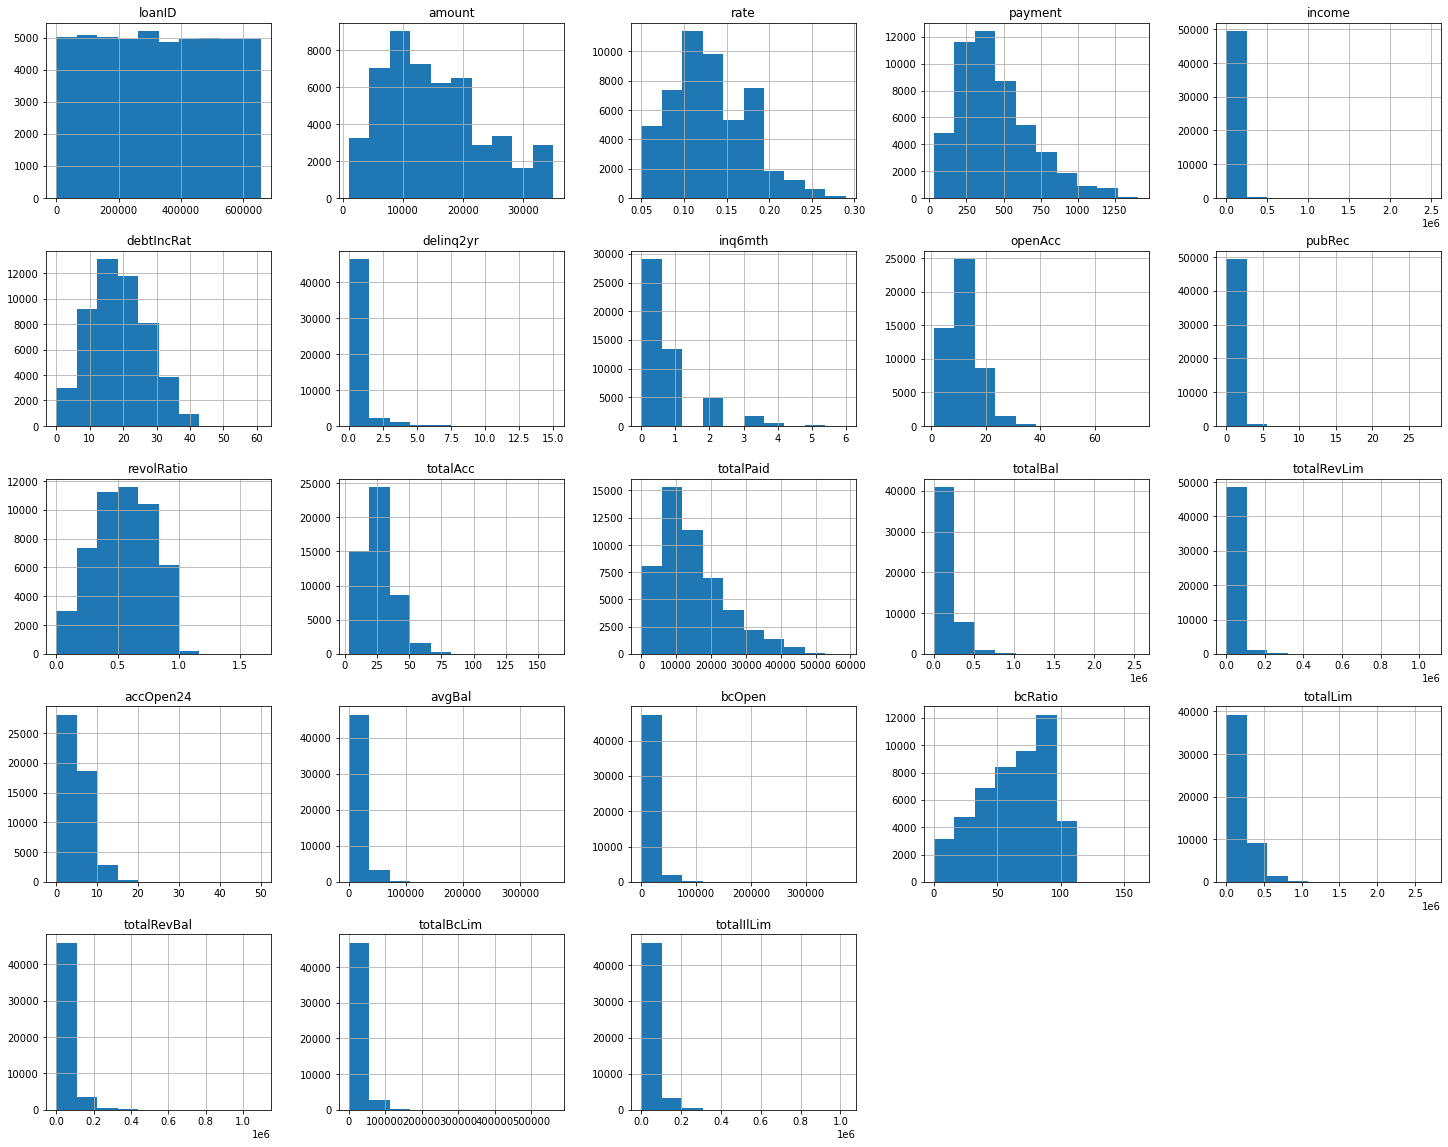

In [31]:
df.hist(figsize=(25,20))

In [32]:
delinquent_stats = df[(df['status']=='Charged Off') | (df['status']=='Default') | (df['status']=='Late (16-30 days)') | (df['status']=='Late (31-120 days)')].describe().T

In [33]:
delinquent_stats

,count,mean,std,min,25%,50%,75%,max
loanID,8132.0,328298.144122,191979.361140,151.00,157953.2500,329112.50,497152.0000,656694.00
amount,8132.0,15481.025578,8398.294921,1000.00,9600.0000,14400.00,20000.0000,35000.00
rate,8132.0,0.154206,0.043800,0.05,0.1200,0.15,0.1800,0.29
payment,8132.0,453.644787,242.669813,32.74,281.3225,399.08,576.2900,1382.36
income,8132.0,69303.478304,46274.879719,8796.00,43000.0000,60000.00,82000.0000,1300000.00
debtIncRat,8132.0,20.367675,8.642234,0.00,13.9400,20.19,26.5200,61.21
delinq2yr,8132.0,0.370020,0.955640,0.00,0.0000,0.00,0.0000,15.00
inq6mth,8132.0,0.816404,1.039669,0.00,0.0000,1.00,1.0000,6.00
openAcc,8132.0,12.115224,5.754339,2.00,8.0000,11.00,15.0000,76.00
pubRec,8132.0,0.267462,0.655457,0.00,0.0000,0.00,0.0000,19.00


In [34]:
overall_stats

,count,mean,std,min,25%,50%,75%,max
loanID,49999.0,327086.861777,189492.011929,16.00,163302.50,324657.00,491697.00,656727.00
amount,49999.0,15145.527911,8527.772776,1000.00,8500.00,13800.00,20000.00,35000.00
rate,49999.0,0.130407,0.044192,0.05,0.10,0.13,0.16,0.29
payment,49999.0,442.737519,244.835744,30.54,265.84,385.79,578.68,1407.01
income,49999.0,76173.789855,65235.025565,4000.00,46238.50,65000.00,90000.00,7446395.00
debtIncRat,49999.0,18.731157,8.444506,0.00,12.39,18.21,24.73,61.21
delinq2yr,49999.0,0.346167,0.907636,0.00,0.00,0.00,0.00,15.00
inq6mth,49999.0,0.639553,0.938869,0.00,0.00,0.00,1.00,6.00
openAcc,49999.0,11.849217,5.524801,1.00,8.00,11.00,15.00,76.00
pubRec,49999.0,0.232925,0.624342,0.00,0.00,0.00,0.00,28.00


In [35]:
print(df['grade'].value_counts())

C    14136
B    13755
A     8202
D     8186
E     4200
F     1240
G      278
Name: grade, dtype: int64


In [36]:
df[df['grade']=='G'].describe().T

,count,mean,std,min,25%,50%,75%,max
loanID,278.0,320005.625899,199206.726038,12772.00,118737.0000,314694.500,500168.0000,655917.00
amount,278.0,19895.413669,8153.885705,1000.00,12806.2500,18975.000,26962.5000,35000.00
rate,278.0,0.264317,0.014498,0.06,0.2600,0.260,0.2700,0.29
payment,278.0,610.873058,246.575047,40.19,394.0775,586.730,812.4075,1407.01
income,278.0,70800.575540,63980.315605,12527.00,45039.0000,60800.000,82000.0000,980000.00
debtIncRat,278.0,19.907302,8.542423,0.00,14.1825,20.040,26.0375,39.82
delinq2yr,278.0,0.345324,0.737957,0.00,0.0000,0.000,0.0000,5.00
inq6mth,278.0,1.384892,1.356648,0.00,0.0000,1.000,2.0000,6.00
openAcc,278.0,12.406475,6.058996,2.00,8.0000,11.000,14.7500,55.00
pubRec,278.0,0.262590,0.556650,0.00,0.0000,0.000,0.0000,3.00


In [37]:
overall_grades = df.value_counts(df['grade'])
charged_off_grades = df[df['status']=='Charged Off'].value_counts(df['grade'])

In [41]:
grade_review = pd.concat([overall_grades, charged_off_grades, (100 * charged_off_grades/overall_grades)], axis = 1)
grade_review.columns = ['overall', 'charged off', '%']

grade_review.sort_values(by='grade')

,overall,charged off,%
grade,,,
A,8202,389,4.742746
B,13755,1258,9.145765
C,14136,2284,16.157329
D,8186,1881,22.978256
E,4200,1194,28.428571
F,1240,455,36.693548
G,278,118,42.446043


In [39]:
grade_review

,overall,charged off,%
grade,,,
C,14136,2284,16.157329
B,13755,1258,9.145765
A,8202,389,4.742746
D,8186,1881,22.978256
E,4200,1194,28.428571
F,1240,455,36.693548
G,278,118,42.446043
